# Assignment 4

## Excercise 1: Random walk

https://www.blog.pythonlibrary.org/2021/06/23/creating-an-animated-gif-with-python/ - gif generation

Make a presentation

In [53]:
import random
import math
import glob
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import os
import imageio
import matplotlib.animation as animation

In [54]:
if not os.path.exists('images'):
    os.makedirs('images')

In [114]:
def make_gif(frame_folder, n):
    frames = []
    for i in range(n):
        frames.append(Image.open(f"{frame_folder}/{i}.png"))
    frame_one = frames[0]
    frame_one.save("random_walk.gif", format="GIF", append_images=frames,
               save_all=True, duration=100, loop=0)

In [115]:
def random_walk(steps):
    xs = np.zeros(steps) 
    ys = np.zeros(steps) 
  
    for i in range(1, steps): 
        val = random.randint(1, 4) 
        if val == 1: 
            xs[i] = xs[i - 1] + 1
            ys[i] = ys[i - 1] 
        elif val == 2: 
            xs[i] = xs[i - 1] - 1
            ys[i] = ys[i - 1] 
        elif val == 3: 
            xs[i] = xs[i - 1] 
            ys[i] = ys[i - 1] + 1
        else: 
            xs[i] = xs[i - 1] 
            ys[i] = ys[i - 1] - 1
    return xs, ys
    
def generate_image(xs, ys):
    for i in range(len(xs)):
        #plt.figure(figsize=(10, 10))
        fig = plt.gcf()
        p1 = plt.plot(xs[0:i+1], ys[0:i+1], color='blue')
        plt.plot(xs[i], ys[i], 'rs')
        plt.xlim(-10, 10)
        plt.ylim(-10, 10)
        fig.figure.set_size_inches(10, 7, forward=True)
        plt.savefig(f'images/{i}.png', dpi=200)
        plt.close()
    make_gif('images', len(xs))
    #mg1('images', len(xs))

In [116]:
xs, ys = random_walk(30)
generate_image(xs, ys)

## Excercise 2: Pearsons random walk

In [149]:
#monte carlo approach M=1000, N=1000
def pearson_rw(steps, a=1):
    rx = np.zeros(steps+1)
    ry = np.zeros(steps+1)
    for i in range(1, steps+1): 
        angle = np.random.uniform(low=0, high=2*np.pi, size=1)[0]
        rx[i] = rx[i-1] + a*math.cos(angle)
        ry[i] = ry[i-1] + a*math.sin(angle)
    return rx, ry

In [156]:
rx, ry = pearson_rw(1000)

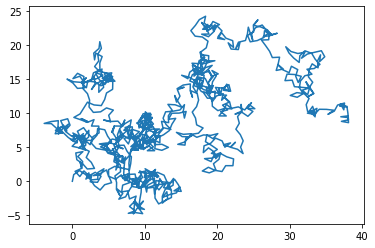

In [157]:
plt.plot(rx, ry)

In [141]:
def simulate_MC_pearson(M=1000, N=1000):
    hist1 = np.zeros(M)
    hist2 = np.zeros(M)
    for i in range(M):
        rx, ry = pearson_rw(N)
        hist1[i] = sum([x>0 for x in rx])/N
        hist2[i] = sum([rx[j]>0 and ry[j]>0 for j in range(len(rx))])/N
    return hist1, hist2

In [142]:
hist1, hist2 = simulate_MC_pearson(1000, 1000)

(array([220.,  87.,  57.,  62.,  79.,  50.,  72.,  72.,  99., 202.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

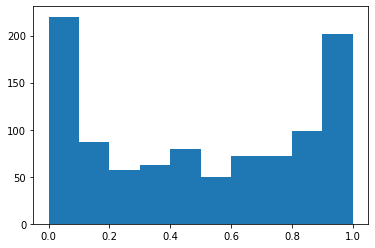

In [143]:
plt.hist(hist1)

(array([475., 110.,  78.,  63.,  48.,  54.,  47.,  37.,  41.,  47.]),
 array([0.    , 0.0999, 0.1998, 0.2997, 0.3996, 0.4995, 0.5994, 0.6993,
        0.7992, 0.8991, 0.999 ]),
 <BarContainer object of 10 artists>)

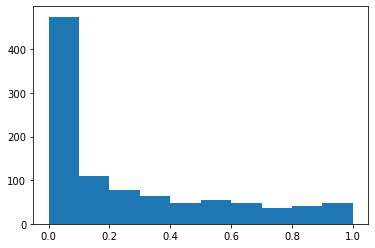

In [144]:
plt.hist(hist2)

### generate more examples and distributions

In [117]:
def make_gif_graph(frame_folder):
    frames = [Image.open(image) for image in glob.glob(f"{frame_folder}/graph*.JPG")]
    frame_one = frames[0]
    frame_one.save("random_walk_graph.gif", format="GIF", append_images=frames,
               save_all=True, duration=100, loop=0)

In [118]:
#MC approach, compare for all three graphs generated in previous list 
def rw_on_graph_with_gif(graph, steps, starting_node=0):
    visited_nodes = []
    if starting_node == 0:
        starting_node = [n for n in graph.nodes()][0]
    visited_nodes.append(starting_node)

    fig = plt.figure()
    pos = nx.spring_layout(graph)
    color_map = ['red' if node == starting_node else 'blue' for node in graph] 
    nx.draw(graph, ax=fig.add_subplot(), pos=pos, node_color = color_map)
    fig.savefig(f"images/graph{0}.jpg")
    
    for i in range(1, steps):
        new_nodes = [n for n in graph.neighbors(starting_node)]
        starting_node = random.choice(new_nodes)
        
        fig = plt.figure()
        color_map = ['red' if node == starting_node else 'blue' for node in graph] 
        nx.draw(graph, ax=fig.add_subplot(), pos=pos, node_color = color_map)
        fig.savefig(f"images/graph{i}.jpg")

    make_gif_graph('images')

In [158]:
def rw_on_graph(graph, steps, starting_node=0):
    visited_nodes = np.zeros(steps)
    if starting_node == 0:
        starting_node = [n for n in graph.nodes()][0]
    visited_nodes[0] = starting_node
    
    for i in range(1, steps):
        new_nodes = [n for n in graph.neighbors(starting_node)]
        starting_node = random.choice(new_nodes)
        visited_nodes[i] = starting_node
    return visited_nodes

In [159]:
G = nx.complete_graph(10)

In [160]:
rw_on_graph(G, 10)

array([0., 2., 1., 5., 0., 3., 2., 5., 1., 3.])

In [161]:
def avg_hitting_time(graph, origin_node, visited_nodes):
    d = {}
    for node in graph.nodes():
        if node != origin_node:
            occ = visited_nodes.count(node)
            d[node] = occ
    return d

In [ ]:
def avg_hitting_times(M=1000, N = 1000):
    